<a href="https://colab.research.google.com/github/darkginka/Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [383]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [384]:
import pandas as pd

In [385]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [386]:
# food_nutrition.info()
food_nutrition.head()

Category                     Description  NutrientDataBankNumber  Carotene  \
0     Milk                     Milk, human                11000000         7   
1     Milk                       Milk, NFS                11100000         4   
2     Milk                     Milk, whole                11111000         7   
3     Milk         Milk, low sodium, whole                11111100         7   
4     Milk  Milk, calcium fortified, whole                11111150         7   

   Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Fiber  \
0              0          6.89           14     16.0    0.0   
1              0          4.87            8     17.9    0.0   
2              0          4.67           12     17.8    0.0   
3              0          4.46           14     16.0    0.0   
4              0          4.67           12     17.8    0.0   

   Lutein and Zeaxanthin  ...  Potassium  Sodium  Zinc  Vitamin_A  \
0                      0  ...         51      17  0.17         61   
1                      0  ...        157      39  0.42         59   
2                      0  ...        150      38  0.41         32   
3                      0  ...        253       3  0.38         29   
4                      0  ...        150      38  0.41         32   

   Vitamin_B12  Vitamin_B6  Vitamin_C  Vitamin_D  Vitamin_E  Vitamin_K  
0         0.05       0.011        5.0      0.014       0.08        0.3  
1         0.56       0.060        0.1      0.057       0.03        0.2  
2         0.54       0.061        0.0      0.056       0.05        0.3  
3         0.36       0.034        0.9      0.020       0.08        0.3  
4         0.54       0.061        0.0      0.056       0.05        0.3  

[5 rows x 37 columns]

In [387]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             92 non-null     int64 
 1   disease                92 non-null     object
 2   ineficient_nutritions  92 non-null     object
 3   Precaution_1           92 non-null     object
 4   Precaution_2           84 non-null     object
 5   Precaution_3           65 non-null     object
 6   Precaution_4           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [388]:
# food_nutrition = food_nutrition[food_nutrition["Description"].str.contains("Beaf") == False]
# food_nutrition.drop(food_nutrition[food_nutrition['Description'].str.contains("Beaf")].index, inplace = True)
# food_nutrition.drop(food_nutrition[food_nutrition['Description'].str.contains("Pork")].index, inplace = True)
# food_nutrition.drop(food_nutrition[food_nutrition['Description'].str.contains("Steck")].index, inplace = True)

In [389]:
# food_nutrition.fillna(value = 0, inplace = True)

**Part-1**

In [390]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [391]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-101
  fd= disease_nutrition.iloc[i]
  pre_list = [fd["Precaution_1"],fd["Precaution_2"],fd["Precaution_3"],fd["Precaution_4"]]
  print("Precauctions: ",pre_list)         
  disease_ie = get_disease_ie(disease_name)
  dis_list = list(disease_ie.split(" "))
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print("Ineficient Nnutritions: ",dis_list)

Enter Disease Name: acne
Precauctions:  ['bath twice', 'avoid fatty spicy food', 'drink plenty of Water', 'avoid too many products']
Ineficient Nnutritions:  ['SaturatedFat', 'Fiber', 'Riboflavin', 'Vitamin_A', 'Zinc', 'Vitamin_D', 'Vitamin_E']


**Part-2**

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

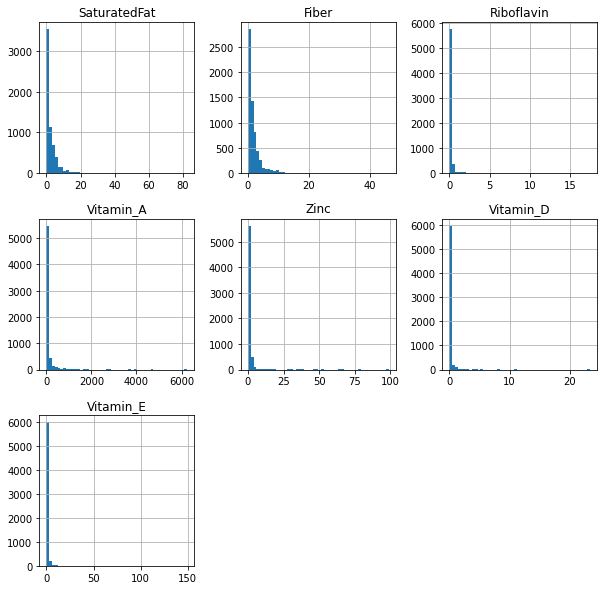

In [393]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [394]:
from sklearn.preprocessing import MinMaxScaler

In [395]:
columns_to_cluster = dis_list

In [396]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.         0.00205714 0.0097522  0.0017196  0.00059893
 0.00053548]


In [397]:
columns_to_cluster_scaled = dis_list

In [398]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

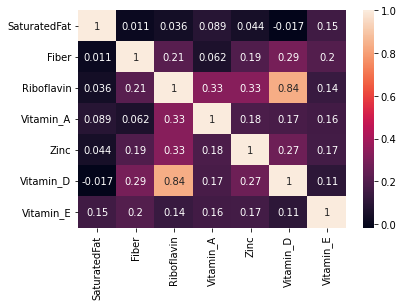

In [399]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [400]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [401]:
n_clusters = range(2,21)
ssd = []
sc = []
dict={}
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)
#calculate the goodness of a clustering
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))
    dict[n] = score


Number of Clusters = 2, Silhouette Score = 0.6323501656425353
Number of Clusters = 3, Silhouette Score = 0.5883435112707048
Number of Clusters = 4, Silhouette Score = 0.5958672549990905
Number of Clusters = 5, Silhouette Score = 0.5421756748924406
Number of Clusters = 6, Silhouette Score = 0.3933382110515812
Number of Clusters = 7, Silhouette Score = 0.4030905206718632
Number of Clusters = 8, Silhouette Score = 0.36280266075311857
Number of Clusters = 9, Silhouette Score = 0.3639610502373998
Number of Clusters = 10, Silhouette Score = 0.3743216120814354
Number of Clusters = 11, Silhouette Score = 0.37576417736469303
Number of Clusters = 12, Silhouette Score = 0.3849572125930139
Number of Clusters = 13, Silhouette Score = 0.3076206527886597
Number of Clusters = 14, Silhouette Score = 0.303461337098808
Number of Clusters = 15, Silhouette Score = 0.30896828324444237
Number of Clusters = 16, Silhouette Score = 0.3113928218474605
Number of Clusters = 17, Silhouette Score = 0.305259033166040

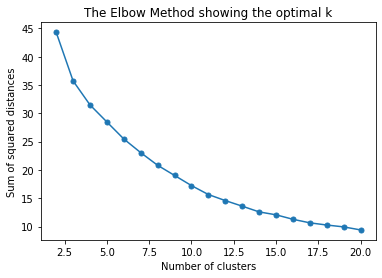

In [402]:
plt.plot(n_clusters, ssd, marker='.', markersize=10,animated=True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [403]:
# kk=[]
# kk.clear()
# for i in range(len(sc)-1):
#   kk.append(sc[i]-sc[i+1])
# k=kk.index(max(kk))+3

In [404]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
# print(pred)
# print(model.labels_)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [0 0 0 0 0 0 0 0 0 0]


**Visualizing the clusters**

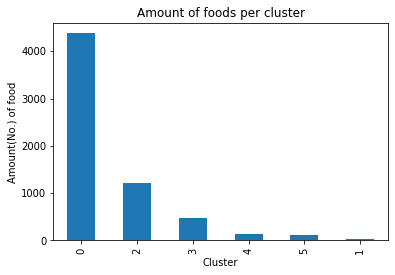

In [405]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount(No.) of food')
plt.title('Amount of foods per cluster')
plt.show()

In [406]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

0    4378
2    1210
3     479
4     132
5     105
1      28
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  28


In [407]:
df_food_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SaturatedFat  6332 non-null   float64
 1   Fiber         6332 non-null   float64
 2   Riboflavin    6332 non-null   float64
 3   Vitamin_A     6332 non-null   float64
 4   Zinc          6332 non-null   float64
 5   Vitamin_D     6332 non-null   float64
 6   Vitamin_E     6332 non-null   float64
 7   cluster       6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [408]:
food_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6332 non-null   object 
 1   Description             6332 non-null   object 
 2   NutrientDataBankNumber  6332 non-null   int64  
 3   Carotene                6332 non-null   int64  
 4   Cryptoxanthin           6332 non-null   int64  
 5   Carbohydrate            6332 non-null   float64
 6   Cholesterol             6332 non-null   int64  
 7   Choline                 6332 non-null   float64
 8   Fiber                   6332 non-null   float64
 9   Lutein and Zeaxanthin   6332 non-null   int64  
 10  Lycopene                6332 non-null   int64  
 11  Niacin                  6332 non-null   float64
 12  Protein                 6332 non-null   float64
 13  Retinol                 6332 non-null   int64  
 14  Riboflavin              6332 non-null   

In [409]:
for i in dis_list:
  food_nutrition=food_nutrition.drop([i], axis = 1)
  
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

Description
cluster                                                   
0                                            Seafood sauce
0                Scallops, cooked, NS as to cooking method
0        Chicken drumstick, baked or broiled, skin eate...
0                                          Watermelon, raw
0                              Prunes, baby food, strained
0                   Sweet potato, boiled, made with butter
0        Rice, white, with carrots, dark green vegetabl...
0            Trout, coated, fried, made with cooking spray
0        Rice, brown, with vegetables, soy-based sauce,...
0                                               Candy, NFS

Description
cluster                                                   
1                                               Flax seeds
1                                               Chia seeds
1          Cereal (General Mills Fiber One Honey Clusters)
1                                 Vegetable mixture, dried
1                                  Wheat bran, unprocessed
1                                                 Soy nuts
1                                                    Yeast
1           Cookie, oatmeal, reduced fat, NS as to raisins
1                                     Crackers, crispbread
1        Cereal or granola bar (General Mills Fiber One...

Description
cluster                                                   
2           Stuffed cabbage, with meat, Puerto Rican style
2        Cheese sandwich, reduced fat Cheddar cheese, o...
2               Cake, rice flour, without icing or filling
2                                       Cookie, toffee bar
2                  Hamburger wrap sandwich, from fast food
2                         Crackers, cheese, reduced sodium
2        Chicken fillet sandwich, fried, on white bun; ...
2                                      Cookie, sugar wafer
2                                   Cookie, chocolate chip
2        Pie, lemon, not cream or meringue, individual ...

Description
cluster                                           
3                               Pink beans, cooked
3                    Beans and tomatoes, fat added
3        Bread, whole wheat, with raisins, toasted
3                            Tortilla chips, plain
3                         Cereal (Post Grape-Nuts)
3        Cookie, brownie, fat free, NS as to icing
3                                     Avocado, raw
3            Cereal (Kellogg's Raisin Bran Crunch)
3                       Peruvian beans, from dried
3                   Potato chips, popped, flavored

Description
cluster                                                   
4        Cream puff, eclair, custard or cream filled, N...
4                                           Coconut, fresh
4                         Queso Anejo, aged Mexican cheese
4                                          Whipped topping
4                            Cheese, Swiss, reduced sodium
4                                  Animal fat or drippings
4                                           Cottonseed oil
4                                            Cheese, Colby
4                          Cake, pound, Puerto Rican style
4                                         Chocolate, white

Description
cluster                                                   
5                     Cereal (General Mills Chex Cinnamon)
5                Cereal (General Mills Cheerios Honey Nut)
5               Nutrition bar or meal replacement bar, NFS
5                                           Liver dumpling
5                   Cereal (Malt-O-Meal Cinnamon Toasters)
5                                              Eel, smoked
5        Nutritional powder mix, sugar free (Carnation ...
5                                   Chicken liver, braised
5                                       Cereal, corn puffs
5        Cereal or granola bar (Kellogg's Nutri-Grain Y...

In [410]:
df_food_joined.head(5)
df_food_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332 entries, 0 to 4
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6332 non-null   object 
 1   Description             6332 non-null   object 
 2   NutrientDataBankNumber  6332 non-null   int64  
 3   Carotene                6332 non-null   int64  
 4   Cryptoxanthin           6332 non-null   int64  
 5   Carbohydrate            6332 non-null   float64
 6   Cholesterol             6332 non-null   int64  
 7   Choline                 6332 non-null   float64
 8   Lutein and Zeaxanthin   6332 non-null   int64  
 9   Lycopene                6332 non-null   int64  
 10  Niacin                  6332 non-null   float64
 11  Protein                 6332 non-null   float64
 12  Retinol                 6332 non-null   int64  
 13  Selenium                6332 non-null   float64
 14  SugarTotal              6332 non-null   flo

**Applying PCA to visualize the clusters**

In [411]:
from sklearn.decomposition import PCA

In [412]:
pca = PCA(n_components=len(dis_list), random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [413]:
column_list=[]
for i in range(len(dis_list)):
  column_list.append("PC"+str(i))
print(column_list)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [414]:
df_pca = pd.DataFrame(food_pca, columns=column_list)
df_pca['cluster'] = model.labels_
# df_pca.head()
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC0      6332 non-null   float64
 1   PC1      6332 non-null   float64
 2   PC2      6332 non-null   float64
 3   PC3      6332 non-null   float64
 4   PC4      6332 non-null   float64
 5   PC5      6332 non-null   float64
 6   PC6      6332 non-null   float64
 7   cluster  6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [415]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    28
2    28
4    28
1    28
3    28
5    28
Name: cluster, dtype: int64

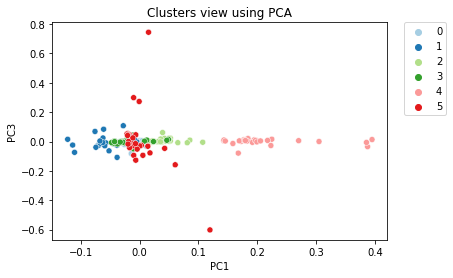

In [416]:
sns.scatterplot(x='PC1', y='PC3', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [417]:
df_user_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')
for cluster in df_food_scaled['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

Description
cluster                                                   
0        Coffee creamer, liquid, fat free, sugar free, ...
0                             Bread stuffing made with egg
0          Halibut, coated, baked or broiled, no added fat
0        Stuffed cabbage, with meat and rice, Syrian di...
0                       Potato, mashed, ready-to-heat, NFS
0        Chicken or turkey and vegetables excluding car...
0        Seafood soup with potatoes, and vegetables exc...
0            Potato salad, made with light creamy dressing
0                         Corn, creamed, baby food, junior
0        Chicken or turkey noodle soup, canned or ready...

Description
cluster                                                   
2                   Chicken "wings", plain, from precooked
2        Pancakes, with chocolate, from fast food / res...
2               Fish stick, patty or nugget from fast food
2                      Cookie, chocolate chip, reduced fat
2                              Quarter Pounder (McDonalds)
2        Cheese sandwich, American cheese, on whole whe...
2        Cheese sandwich, reduced fat Cheddar cheese, o...
2                     Doughnut, custard-filled, with icing
2                                        Burrito with meat
2                              Korean dressing or marinade

Description
cluster                                      
4                          Nuts, carob-coated
4         Milk, dry, not reconstituted, whole
4            Cheese, American, reduced sodium
4                   Cheese, Blue or Roquefort
4        Industrial oil as ingredient in food
4                                Cheese, Brie
4               Chocolate, white, with cereal
4             Cheese, Cheddar, reduced sodium
4                             Cheese, Fontina
4                           Coconut, packaged

Description
cluster                                                   
1                         Cereal (General Mills Fiber One)
1                 Cereal (Nature's Path Organic Flax Plus)
1                            Coffee substitute, dry powder
1                              Cereal (Kellogg's All-Bran)
1                                        Wheat germ, plain
1         Nutritional powder mix, high protein (Slim Fast)
1        Cereal (General Mills Fiber One Raisin Bran Cl...
1           Cookie, oatmeal, reduced fat, NS as to raisins
1        Cereal or granola bar, high fiber, coated with...
1                                    Cereal (Kashi GOLEAN)

Description
cluster                                                   
3        Cereal (Post Great Grains Raisins, Dates, and ...
3                                          Green peas, raw
3                                                Roll, rye
3                  Crackers, wheat, flavored (Wheat Thins)
3        Peanut butter and jelly sandwich, with reduced...
3        Crackers, whole grain, sandwich, peanut butter...
3                  Kidney beans, from canned, no added fat
3                                            Tortilla, NFS
3                                            Hummus, plain
3                                   Peanuts, honey roasted

Description
cluster                                               
5           Nutrition bar or meal replacement bar, NFS
5            Cereal (Malt-O-Meal Honey Graham Squares)
5                     Nutritional powder mix (Isopure)
5                 Cereal (Malt-O-Meal Colossal Crunch)
5        Livers, chicken, chopped, with eggs and onion
5                                      Oysters, smoked
5            Nutritional powder mix, high protein, NFS
5              Cereal (General Mills Cheerios Protein)
5         Cereal, frosted oat cereal with marshmallows
5                  Cereal (General Mills Lucky Charms)

In [418]:
# df_user_food_joined.info()
df_user_food_joined.head()

Category                     Description  NutrientDataBankNumber  \
cluster                                                                    
0           Milk                     Milk, human                11000000   
0           Milk                       Milk, NFS                11100000   
0           Milk                     Milk, whole                11111000   
0           Milk         Milk, low sodium, whole                11111100   
0           Milk  Milk, calcium fortified, whole                11111150   

         Carotene  Cryptoxanthin  Carbohydrate  Cholesterol  Choline  \
cluster                                                                
0               7              0          6.89           14     16.0   
0               4              0          4.87            8     17.9   
0               7              0          4.67           12     17.8   
0               7              0          4.46           14     16.0   
0               7              0          4.67           12     17.8   

         Lutein and Zeaxanthin  Lycopene  ...  Vitamin_B6  Vitamin_C  \
cluster                                   ...                          
0                            0         0  ...       0.011        5.0   
0                            0         0  ...       0.060        0.1   
0                            0         0  ...       0.061        0.0   
0                            0         0  ...       0.034        0.9   
0                            0         0  ...       0.061        0.0   

         Vitamin_K  SaturatedFat  Fiber  Riboflavin  Vitamin_A      Zinc  \
cluster                                                                    
0              0.3      0.024352    0.0    0.002057   0.009752  0.001720   
0              0.2      0.014109    0.0    0.007829   0.009432  0.004248   
0              0.3      0.022545    0.0    0.007886   0.005116  0.004147   
0              0.3      0.026109    0.0    0.006000   0.004636  0.003844   
0              0.3      0.022545    0.0    0.007886   0.005116  0.004147   

         Vitamin_D  Vitamin_E  
cluster                        
0         0.000599   0.000535  
0         0.002439   0.000201  
0         0.002396   0.000335  
0         0.000856   0.000535  
0         0.002396   0.000335  

[5 rows x 37 columns]

**Recommending Food**

In [419]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

0    13.828174
2     3.821857
3     1.512950
4     0.416930
5     0.331649
1     0.088440
Name: cluster, dtype: float64

Total food:  20


In [420]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

cluster Category  Description  NutrientDataBankNumber  Carotene  \
0        0     Milk  Milk, human                11000000         7   
1        0     Milk    Milk, NFS                11100000         4   
2        0     Milk  Milk, whole                11111000         7   

   Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Lutein and Zeaxanthin  \
0              0          6.89           14     16.0                      0   
1              0          4.87            8     17.9                      0   
2              0          4.67           12     17.8                      0   

   ...  Vitamin_B6  Vitamin_C  Vitamin_K  SaturatedFat  Fiber  Riboflavin  \
0  ...       0.011        5.0        0.3      0.024352    0.0    0.002057   
1  ...       0.060        0.1        0.2      0.014109    0.0    0.007829   
2  ...       0.061        0.0        0.3      0.022545    0.0    0.007886   

   Vitamin_A      Zinc  Vitamin_D  Vitamin_E  
0   0.009752  0.001720   0.000599   0.000535  
1   0.009432  0.004248   0.002439   0.000201  
2   0.005116  0.004147   0.002396   0.000335  

[3 rows x 38 columns]

In [421]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

cluster Category  Description  NutrientDataBankNumber  Carotene  \
0        0     Milk  Milk, human                11000000         7   
1        0     Milk    Milk, NFS                11100000         4   
2        0     Milk  Milk, whole                11111000         7   

   Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Lutein and Zeaxanthin  \
0              0          6.89           14     16.0                      0   
1              0          4.87            8     17.9                      0   
2              0          4.67           12     17.8                      0   

   ...  Iron  Magnesium  Phosphorus  Potassium  Sodium  Vitamin_B12  \
0  ...  0.03          3          14         51      17         0.05   
1  ...  0.00         12         103        157      39         0.56   
2  ...  0.00         12         101        150      38         0.54   

   Vitamin_B6  Vitamin_C  Vitamin_K  cluster_pct  
0       0.011        5.0        0.3    13.828174  
1       0.060        0.1        0.2    13.828174  
2       0.061        0.0        0.3    13.828174  

[3 rows x 32 columns]

In [442]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    foods = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,foods], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
# final_Food.head(10)

In [443]:
final_Food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cluster                 20 non-null     int64  
 1   Category                20 non-null     object 
 2   Description             20 non-null     object 
 3   NutrientDataBankNumber  20 non-null     int64  
 4   Carotene                20 non-null     int64  
 5   Cryptoxanthin           20 non-null     int64  
 6   Carbohydrate            20 non-null     float64
 7   Cholesterol             20 non-null     int64  
 8   Choline                 20 non-null     float64
 9   Lutein and Zeaxanthin   20 non-null     int64  
 10  Lycopene                20 non-null     int64  
 11  Niacin                  20 non-null     float64
 12  Protein                 20 non-null     float64
 13  Retinol                 20 non-null     int64  
 14  Selenium                20 non-null     floa

**Appying Random Forest**

In [424]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [425]:
X=df_food_scaled[columns_to_cluster_scaled]   # Features
y=df_food_scaled['cluster']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [426]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
#Train the model using the training sets 
y_pred=clf.predict(X_test)
y_pred

array([0, 4, 0, ..., 2, 0, 0], dtype=int32)

In [427]:
clf.estimators_[0]
sample_tree = clf.estimators_[4]

In [428]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [429]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['K1', 'K2','K3', 'K4','K5', 'K6'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [430]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [431]:
clf.feature_importances_

array([0.50402818, 0.23235526, 0.0576097 , 0.04690587, 0.08546529,
       0.0390758 , 0.03455989])

In [432]:
imp_df = pd.DataFrame({
    "Nutritions": X_train.columns,
    "Importance": clf.feature_importances_
})

In [433]:
imp_df.sort_values(by="Importance", ascending=False)

Nutritions  Importance
0  SaturatedFat    0.504028
1         Fiber    0.232355
4          Zinc    0.085465
2    Riboflavin    0.057610
3     Vitamin_A    0.046906
5     Vitamin_D    0.039076
6     Vitamin_E    0.034560

In [434]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [435]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9878947368421053


In [436]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1331,    0,    6,    0,    0,    0],
       [   0,    7,    0,    2,    0,    0],
       [   7,    0,  341,    0,    0,    0],
       [   0,    0,    0,  131,    0,    1],
       [   0,    0,    0,    0,   40,    0],
       [   1,    1,    2,    3,    0,   27]])

In [438]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm)

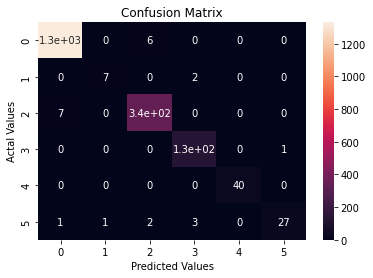

In [439]:
#Plotting the confusion matrix
ax = sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
final_Food[['Description']]

In [ ]:
list_of_foods = final_Food['Description'].to_list()
print(list_of_foods)